## This project is analyzing the correlation of movies Dataset

### Dataset: movie.csv
### Skill: Statistic analysis, data cleaning, visulisation.
### In my conclusion, I see that vote vs gross has a highest correlation.

In [1]:
# Get access with Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Using ggplot style
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read in Dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset_Portfolio/movies.csv')


In [3]:
print(df.head())

                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nic

In [4]:
# Looking at the missing data
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, pct_missing))


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
# Fill missing value as mean columns in numeric variable
numeric_columns = df.select_dtypes(include=[np.number]).columns
column_means = df[numeric_columns].mean()
# Fill na by mean
df[numeric_columns] = df[numeric_columns].fillna(column_means)


# Fill missing value as mode in catgorical variable
mode_values = df.mode().iloc[0]
categorical_variables = ['rating', 'released', 'writer', 'star', 'country', 'company']
for var in categorical_variables:
    df[var].fillna(mode_values[var], inplace=True)

# Looking at the missing data
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [6]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# Change data type of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

# Create correct year columns
df['Year_correct'] = df['released'].astype(str).str[:4]

In [8]:
# pd.set_option('display.max_rows', None)
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0,Febr
7625,The Untold Story,R,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104.0,Janu
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0,June
2417,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,Apri


In [9]:
# Drop duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
5813                        10 West Studios
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2385, dtype: object

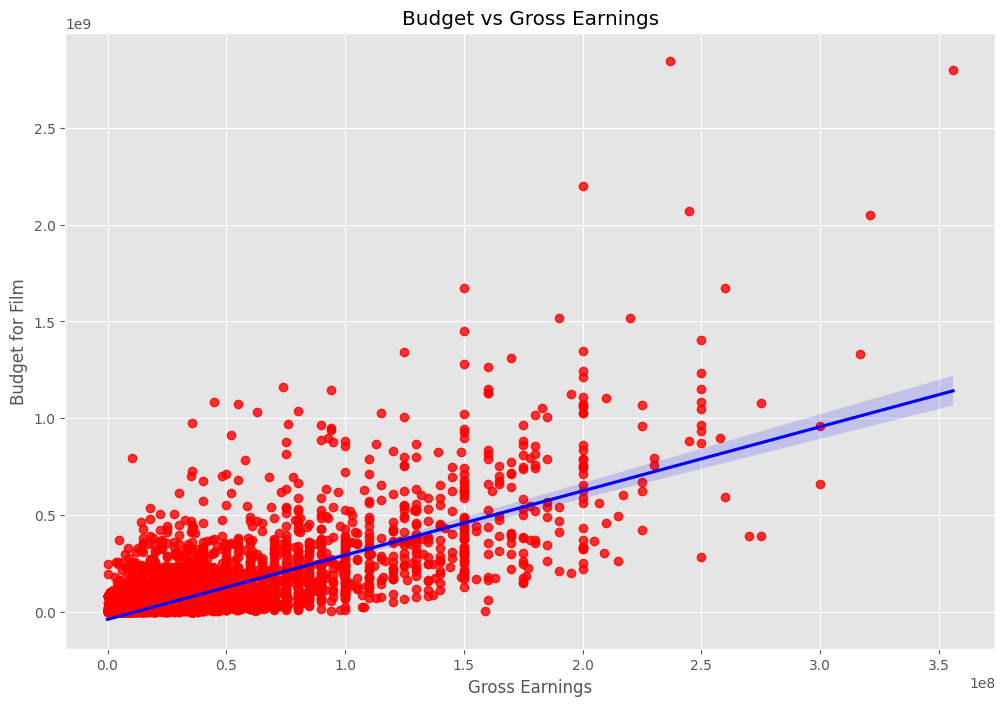

In [10]:
# Plot budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [11]:
# Looking at correlation
numeric_columns = df.select_dtypes(include=[np.number])
numeric_columns.corr() # pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097936,0.222810,0.265578,0.252042,0.120766
score,0.097936,1.000000,0.409182,0.064541,0.182868,0.399329
votes,0.222810,0.409182,1.000000,0.421007,0.628713,0.309166
budget,0.265578,0.064541,0.421007,1.000000,0.711270,0.265287
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241335
runtime,0.120766,0.399329,0.309166,0.265287,0.241335,1.000000


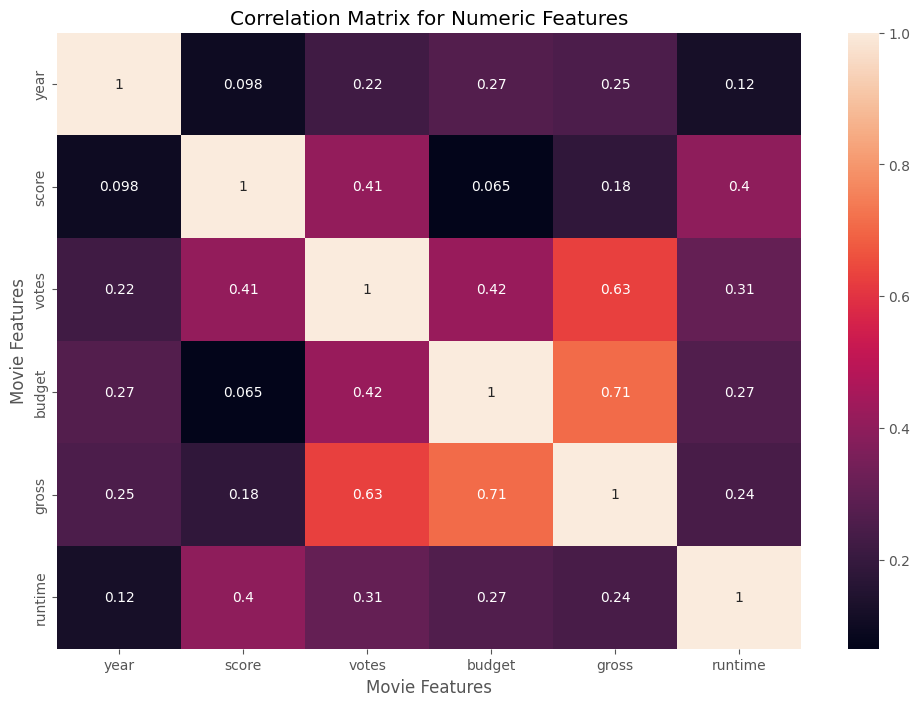

In [12]:
# Show heatmap pearson method
sns.heatmap(numeric_columns.corr(method = 'pearson'), annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()


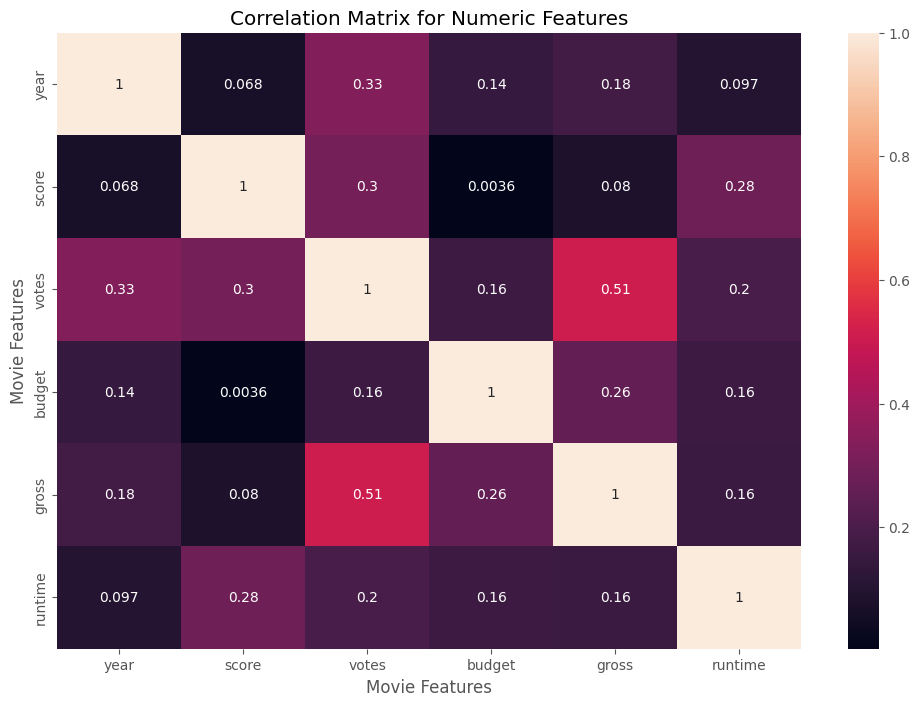

In [13]:
# Show heatmap kendall method
sns.heatmap(numeric_columns.corr(method = 'kendall'), annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

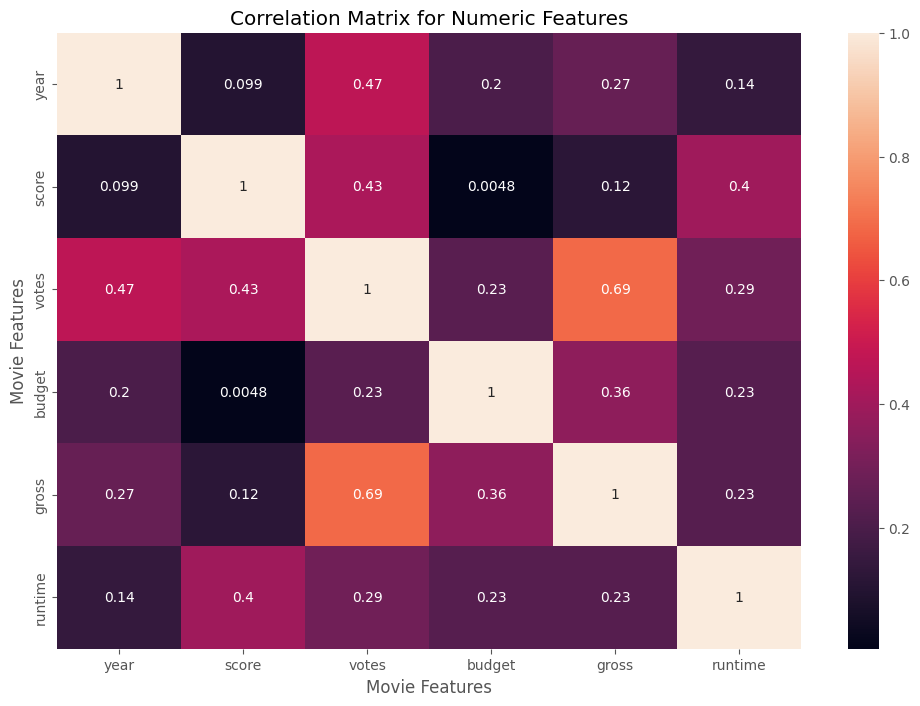

In [14]:
# Show heatmap spearman method
sns.heatmap(numeric_columns.corr(method = 'spearman'), annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [15]:
# Convert catgorical variable to numerical variable
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.corr()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_correct
name,1.000000,-0.012441,0.016355,0.011453,-0.011087,0.017095,0.013086,0.009079,0.010018,0.006749,-0.010425,0.020368,0.005466,0.010369,0.010390,-0.012343
rating,-0.012441,1.000000,0.123465,0.027931,0.023643,0.013246,0.012378,0.016255,-0.002795,0.005314,0.026930,-0.156544,-0.130083,-0.079626,0.066641,0.020036
genre,0.016355,0.123465,1.000000,-0.081261,0.029997,0.027959,-0.145276,-0.015258,0.006746,-0.004856,-0.035896,-0.310566,-0.230267,-0.070013,-0.052699,0.027960
year,0.011453,0.027931,-0.081261,1.000000,-0.000484,0.097936,0.222810,-0.020795,-0.007901,-0.027745,-0.069423,0.265578,0.252042,-0.011438,0.120766,-0.002132
released,-0.011087,0.023643,0.029997,-0.000484,1.000000,0.042617,0.016114,-0.001492,-0.003461,0.015550,-0.022042,0.012267,0.001637,-0.008443,0.000867,0.995317
score,0.017095,0.013246,0.027959,0.097936,0.042617,1.000000,0.409182,0.009559,0.019795,-0.000979,-0.134577,0.064541,0.182868,-0.004594,0.399329,0.041470
votes,0.013086,0.012378,-0.145276,0.222810,0.016114,0.409182,1.000000,0.000260,0.000232,-0.019452,0.073582,0.421007,0.628713,0.130638,0.309166,0.017297
director,0.009079,0.016255,-0.015258,-0.020795,-0.001492,0.009559,0.000260,1.000000,0.299512,0.039715,0.017926,-0.010364,-0.014272,0.004250,0.017624,-0.000070
writer,0.010018,-0.002795,0.006746,-0.007901,-0.003461,0.019795,0.000232,0.299512,1.000000,0.028745,0.014409,-0.033217,-0.023186,0.001665,-0.003698,-0.003956
star,0.006749,0.005314,-0.004856,-0.027745,0.015550,-0.000979,-0.019452,0.039715,0.028745,1.000000,-0.014749,-0.016952,-0.002683,0.008072,0.009273,0.015164


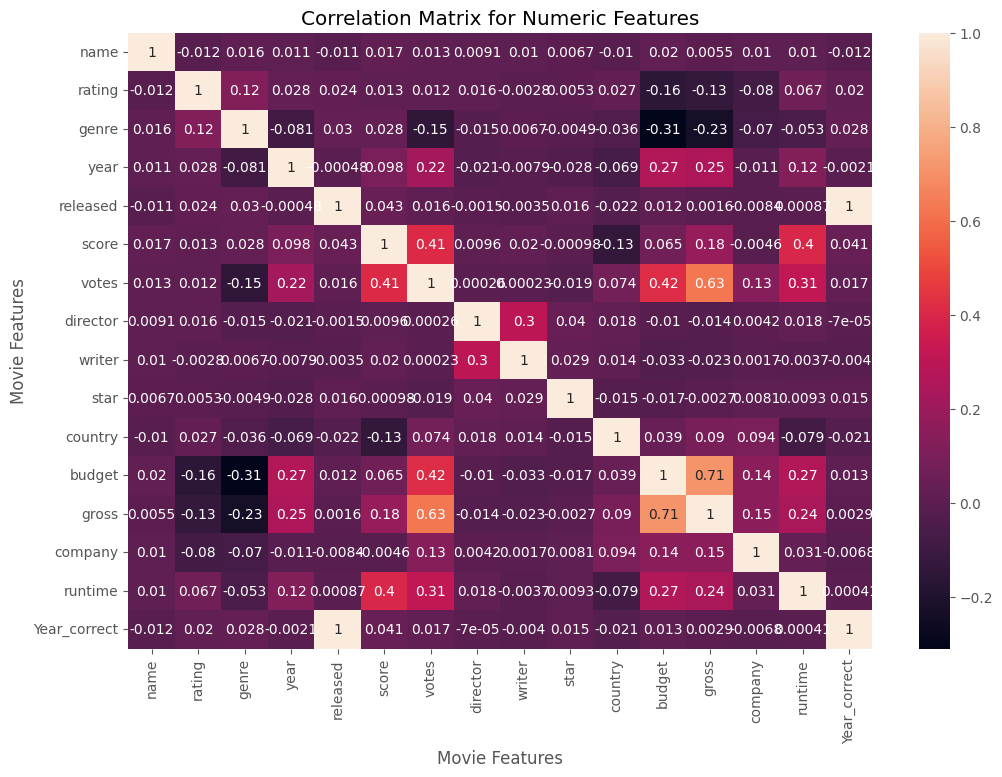

In [16]:
# Show heatmap pearson method
sns.heatmap(df_numerized.corr(method = 'pearson'), annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

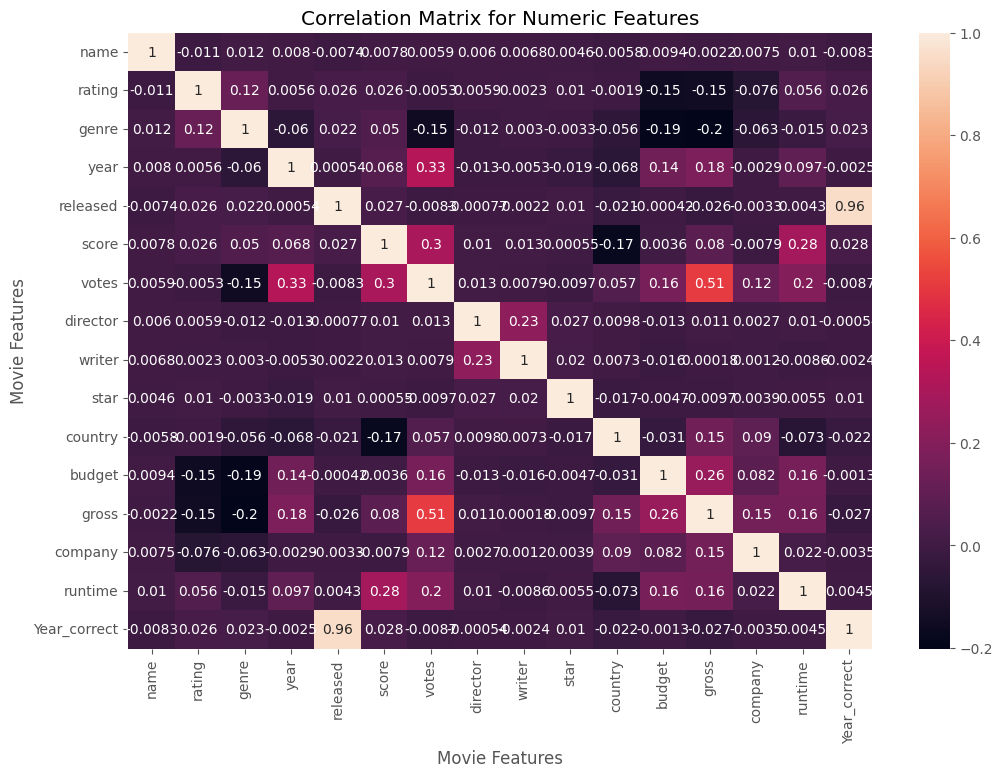

In [17]:
# Show heatmap kendall method
sns.heatmap(df_numerized.corr(method = 'kendall'), annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

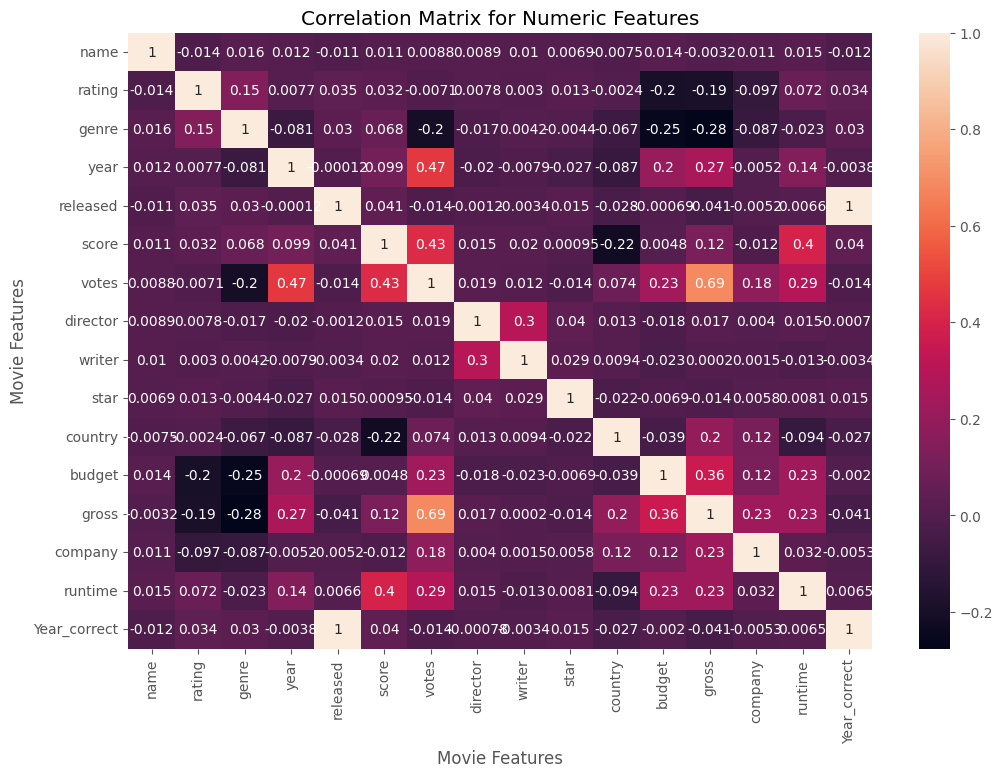

In [18]:
# Show heatmap spearman method
sns.heatmap(df_numerized.corr(method = 'spearman'), annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [19]:
corr_matrix = df_numerized.corr()
corr_pairs = corr_matrix.unstack()
corr_pairs

name          name            1.000000
              rating         -0.012441
              genre           0.016355
              year            0.011453
              released       -0.011087
                                ...   
Year_correct  budget          0.013101
              gross           0.002905
              company        -0.006845
              runtime         0.000410
              Year_correct    1.000000
Length: 256, dtype: float64

In [20]:
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes         gross           0.628713
gross         votes           0.628713
budget        gross           0.711270
gross         budget          0.711270
released      Year_correct    0.995317
Year_correct  released        0.995317
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
Year_correct  Year_correct    1.000000
dtype: float64